In [1]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/68/8c/42bbb31a25a708e2e24881724ec7bcea05530492de8b1a2e0d8fe43eb2f6/tensorflow-2.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a1/6b/7f62017e3f0b32438dd90bdc1ff0b7b1448b6cb04a1ed84f37b6de95cd7b/h5py-2.10.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/64/21/eebd23060763fedeefb78bc2b286e00fa1d8abda6f70efa2ee08c28af0d4/tensorboard-2.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/5f/bf822211f7f94a2f6d0f8fd3bda3b804d7b24b6d5c84dbc6e6c9df4c74c2/grpcio-1.32.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/74/7e/622d9849abf3afb81e482ffc170758742e392ee129ce1540611199a59237/tensorflow_estimator-2.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
  Using cached https

In [2]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [3]:
#Importing 28x28 images of hand written digits 0-9
mnist= tf.keras.datasets.mnist

In [10]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

#Normalize the data to make it easier for the network to work
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [5]:
print(x_train[0]) #Basically an array

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
import matplotlib.pyplot as plt


<Figure size 640x480 with 1 Axes>

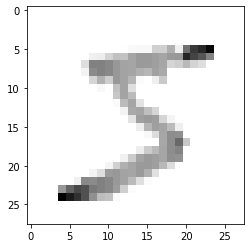

In [11]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [12]:
# Building the model

model=tf.keras.models.Sequential()

In [13]:
# Flatten
model.add(tf.keras.layers.Flatten())

In [14]:
#Building hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#Last model should have the number of images
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6875 - accuracy: 0.8227
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1359 - accuracy: 0.9585
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0920 - accuracy: 0.9709


In [15]:
val_loss, val_acc=model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9676
0.10468758642673492 0.9675999879837036


In [16]:
## You can save a model

model.save('epicmodel')

INFO:tensorflow:Assets written to: epicmodel\assets


In [17]:
new_model=tf.keras.models.load_model('epicmodel')

In [18]:
# Do predictions the function takes a LIST
predictions=new_model.predict([x_test])

In [19]:
print(predictions)

[[1.32460765e-09 5.00487758e-08 6.86322153e-07 ... 3.26439559e-13
  6.61057783e-14 5.00613494e-13]
 [1.86621918e-07 2.65149167e-03 9.96441066e-01 ... 3.71756202e-11
  1.24651765e-11 2.63168515e-11]
 [5.63473293e-07 9.99306917e-01 2.51814217e-05 ... 3.75383102e-09
  1.33334310e-09 3.06949643e-09]
 ...
 [1.46956802e-08 5.34758556e-06 6.55265087e-09 ... 2.14230305e-12
  1.88665294e-12 1.07473850e-12]
 [2.98178929e-06 3.06450744e-07 1.14154075e-09 ... 1.00556620e-11
  8.52937686e-12 1.89502580e-12]
 [8.22988750e-06 1.78418329e-08 7.88320335e-07 ... 1.69665321e-13
  4.52760252e-13 1.05163098e-13]]


In [20]:
import numpy as np
print(np.argmax(predictions[0]))

7


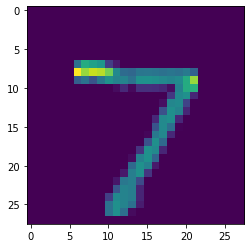

In [23]:
plt.imshow(x_test[0])
plt.show()